In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import graphviz

In [2]:
# df = pd.read_parquet("../../../Data/2022_indicators/processed_Dummies_Stand_2022.parquet")
df = pd.read_parquet("../../../Data/2022_indicators/processed_Dummies_Stand_2022_LessThan40.parquet")
df

,_STATE_1.0,_STATE_6.0,_STATE_9.0,_STATE_12.0,_STATE_13.0,_STATE_15.0,_STATE_17.0,_STATE_18.0,_STATE_20.0,_STATE_21.0,...,SLEPTIM1,HTIN4,_LLCPWT2,HEIGHT3,PHYSHLTH,WTKG3,WEIGHT2,_PSU,_AGE80,_MICHD
2087,1,0,0,0,0,0,0,0,0,0,...,0.053732,-0.791858,1.120740,-0.442285,-1.498830,0.780356,0.076879,-1.142471,-1.016613,2.0
2088,1,0,0,0,0,0,0,0,0,0,...,-0.241227,0.177143,1.252981,-0.338735,-0.776594,0.069398,-0.025487,-1.142257,0.380796,1.0
2090,1,0,0,0,0,0,0,0,0,0,...,-0.241227,-1.276358,1.120740,-0.494060,0.774874,-0.145741,-0.056507,-1.141831,-0.118279,2.0
2091,1,0,0,0,0,0,0,0,0,0,...,-0.093747,-0.065107,1.120740,-0.364623,-1.525579,-0.102998,-0.050303,-1.141618,-1.415873,2.0
2093,1,0,0,0,0,0,0,0,0,0,...,-0.241227,0.419393,1.120740,-0.312848,-1.552329,-1.007724,-0.180588,-1.141191,-0.717168,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431675,0,0,0,0,0,0,0,0,0,0,...,-0.093747,-0.307357,-0.126412,-0.390510,-1.525579,-0.038409,-0.040997,0.814725,0.580426,2.0
431676,0,0,0,0,0,0,0,0,0,0,...,0.053732,-0.307357,0.128715,-0.390510,0.774874,-0.404573,-0.093731,0.814939,-0.018464,2.0
431677,0,0,0,0,0,0,0,0,0,0,...,0.053732,0.903894,-0.126412,-0.261073,-1.445331,0.823574,0.083083,0.815152,-1.216243,2.0
431680,0,0,0,0,0,0,0,0,0,0,...,-0.241227,-1.276358,0.111935,-0.494060,-1.552329,-1.222863,-0.211608,0.815791,-1.515688,2.0


In [3]:
target = df._MICHD
target.value_counts()

2.0    108922
1.0     13898
Name: _MICHD, dtype: int64

In [4]:
df = df.drop("_MICHD", axis =1)
duplicate_cols_to_drop = ["_RFHLTH_1.0",  "_SEX_2.0", "GENHLTH_2.0",  "GENHLTH_5.0", "GENHLTH_3.0", "_SEX_1.0", "CELLSEX1_2.0", "CELLSEX1_1.0", "_LLCPWT", "_PSU", "_EXTETH3_1.0", "HAVARTH4_1.0", "_RACEPR1_2.0", "RMVTETH4_3.0" ]
df = df.drop(duplicate_cols_to_drop, axis=1)
df

,_STATE_1.0,_STATE_6.0,_STATE_9.0,_STATE_12.0,_STATE_13.0,_STATE_15.0,_STATE_17.0,_STATE_18.0,_STATE_20.0,_STATE_21.0,...,_STRWT,DROCDY4_,SLEPTIM1,HTIN4,_LLCPWT2,HEIGHT3,PHYSHLTH,WTKG3,WEIGHT2,_AGE80
2087,1,0,0,0,0,0,0,0,0,0,...,2.794101,-0.117906,0.053732,-0.791858,1.120740,-0.442285,-1.498830,0.780356,0.076879,-1.016613
2088,1,0,0,0,0,0,0,0,0,0,...,2.794101,-0.301975,-0.241227,0.177143,1.252981,-0.338735,-0.776594,0.069398,-0.025487,0.380796
2090,1,0,0,0,0,0,0,0,0,0,...,2.794101,-0.301975,-0.241227,-1.276358,1.120740,-0.494060,0.774874,-0.145741,-0.056507,-0.118279
2091,1,0,0,0,0,0,0,0,0,0,...,2.794101,-0.226182,-0.093747,-0.065107,1.120740,-0.364623,-1.525579,-0.102998,-0.050303,-1.415873
2093,1,0,0,0,0,0,0,0,0,0,...,2.794101,0.780781,-0.241227,0.419393,1.120740,-0.312848,-1.552329,-1.007724,-0.180588,-0.717168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431675,0,0,0,0,0,0,0,0,0,0,...,-0.430260,-0.150389,-0.093747,-0.307357,-0.126412,-0.390510,-1.525579,-0.038409,-0.040997,0.580426
431676,0,0,0,0,0,0,0,0,0,0,...,-0.430260,0.239403,0.053732,-0.307357,0.128715,-0.390510,0.774874,-0.404573,-0.093731,-0.018464
431677,0,0,0,0,0,0,0,0,0,0,...,-0.430260,0.163610,0.053732,0.903894,-0.126412,-0.261073,-1.445331,0.823574,0.083083,-1.216243
431680,0,0,0,0,0,0,0,0,0,0,...,-0.226143,-0.193699,-0.241227,-1.276358,0.111935,-0.494060,-1.552329,-1.222863,-0.211608,-1.515688


In [5]:
# # create logistic regressor 
# lregCV = LogisticRegressionCV(n_jobs=-1,penalty='l1',solver='saga',max_iter=10000)
# # l1 - drives some of the features to 0 because - absolute value 
# # l2 - will just make weights small - square 

In [6]:
# # fit decision tree classifier
# lregCV.fit(df,target)

In [7]:
# # feature coefficients
# coef = lregCV.coef_[0]
# coef = pd.Series(coef,index=df.columns).sort_values(ascending=False)

In [8]:
# coef

In [9]:
# columns_to_zero = coef[coef ==0.0].index
# columns_to_zero = pd.DataFrame({'Columns': columns_to_zero})
# columns_to_zero.to_parquet('../../../Data/2022_indicators/l1_columnsToZero.parquet')
# columns_to_zero


In [10]:
# df = df.drop(columns_to_zero.Columns, axis=1)
# df.shape

In [11]:
# coef = coef[coef != 0.0]
# coef.sort_values(ascending=False)

In [12]:
# coef_df = pd.DataFrame({'coef': coef})
# coef_df.to_parquet('../../../Data/2022_indicators/coef_no_zeros.parquet')
# coef_df.head()

In [34]:
feature_dict= {
    "CVDSTRK3_2.0": "No Stroke",
    "GENHLTH_1.0": "General Health: Excellent",
    "CHCKDNY2_2.0":"No Kidney Disease",
    "DIABETE4_3.0": "No diabetes",
    "SEXVAR_2.0":  "Female", 
    "CHCCOPD3_2.0": "No C.O.P.D.",
    "PERSDOC3_1.0": "Has Personal Health Care Provider", 
    "PERSDOC3_3.0": "No Personal Health Care Provider",
    "SEXVAR_1.0": "Male", 
    "DIABETE4_1.0": "Has Diabetes", 
    "CHCKDNY2_1.0": "Has Kidney Disease",
    "CHECKUP1_1.0": "Last Visited Doc in past Year",
    "GENHLTH_4.0": "Fair General Health",
    "_RFHLTH_2.0": "Adults Fair or Poor Health",
    "PERSDOC3_2.0": "1+ Heath Provider",
    "CVDSTRK3_1.0": "Had a Stroke",
    "_AGE80": "Age",
    "EMPLOY1_1.0": "Employed For Wages",
    "MARITAL_5.0": "Never Married",
    "CHCCOPD3_1.0": "Has C.O.P.D",
    "_AGEG5YR_13.0": "Age 80+", 
    "DIFFWALK_1.0": "Has Difficulty Walking",
    "HAVARTH4_2.0": "No Arthritis",
    "_PRACE2_3.0": "Indian or Alaskan Native",
    "DIFFWALK_2.0": "No Difficulty Walking",
    "PNEUVAC4_2.0": "Never Received Pneumococcal Vaccine",
    "PNEUVAC4_1.0": "Received Pneumococcal Vaccine",
    "DROCDY4_":  "Daily Drinks",
    "_DRDXAR2_2.0": "No Arthritis",
    "RMVTETH4_3.0": "Number of Teeth Removed",
    "PHYSHLTH": "Healthy Days (30 Days)",
    "_BMI5":"BMI", 
    "_DENVST3_1.0": "Visited the Dentist in Past Year",
    "_EXTETH3_1.0": "Adult Had Permanent Teeth Extracted",
    "MEDCOST1_2.0": "Couldn't Pay for Doc in past Year", 
    "LASTDEN4_1.0": "Time Since Last Dentist Visit", 
    "RMVTETH4_8.0": "No Teeth Removed", 
    "RMVTETH4_1.0": "1-5 Teeth Removed",
    "ADDEPEV3_2.0": "No Depressive Disorder",
    "_RACEG22_2.0": "Non-White or Hispanic", 
    "_RACEPR1_2.0": "Race: Black",
    "_IMPRACE_2.0": "Race: Black",
    "_RFBMI5_1.0": "BMI <= 25.00",
    "_METSTAT_2.0" : "Nonmetropolitan", 
    "WEIGHT2": "Weight",
    "_HADSIGM_1.0": "Had Sigmoidoscopy",
    "CHCSCNC1_1.0": "Had Skin Cancer (not Melanoma)",
    "RMVTETH4_2.0": "6+ Teeth Extracted",
    "COVIDPOS_1.0": "Had COVID",
    "LASTDEN4_4.0": "5+ Years Since Dentist",
    "_SMOKGRP_2.0": "Former smoker, 20+ Pack Years, quit < 15 years",
    "_EXTETH3_2.0": "18+ at Risk Has Teeth Extracted",
    "HAVARTH4_1.0": "Has Arthritis",
    "_DRDXAR2_1.0": "Has Arthritis",
    "_RFBMI5_2.0": "BMI > 25.00",
    "SMOKE100_1.0": "Smoked 100+ cigarettes",
    "PRIMINSR_1.0": "Health Insurance Through Employer",
    "BLIND_2.0": "Not Blind",
    "DEAF_2.0": "Not Deaf",
    "SMOKE100_2.0": "Smoked <100 Cigarettes",
    "_SMOKER3_4.0": "Never Smoked",
    "_SMOKGRP_4.0": "Never Smoked",
    "EMPLOY1_8.0": "Unable to Work",
    "ECIGNOW2_1.0" : "Never Used E-Cigarettes"
    
}

# duplicate_cols_to_drop = ["_RFHLTH_1.0",  "_SEX_2.0", "GENHLTH_2.0",  "GENHLTH_5.0", "GENHLTH_3.0" ]

In [14]:
# mapped_columns = [feature_dict[col] if col in feature_dict else col for col in coef.index]
# coef.index = mapped_columns
# # mapped_columns

In [15]:
# display(coef.sort_values(ascending=False))
# coef.sort_values(ascending=True).plot.barh(color='salmon')
# # plt.xlabel('feature weights')

In [16]:
# filtered_coef = pd.concat([coef.head(15), coef.tail(15)])
# display(filtered_coef.sort_values(ascending=False))
# filtered_coef.sort_values(ascending=True).plot.barh(color='salmon')
# plt.xlabel('feature weights')

In [17]:
# initialize tree
dtree = DecisionTreeClassifier(random_state=0)

# define parameter grid to search for lowest validation error rate
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

# initialize cross-validation
dtreeCV = GridSearchCV(dtree,
                      param_grid=parameters,
                      return_train_score=True,
                      n_jobs=-1)

In [18]:
# fit tree using cross-validation to select best tree
dtreeCV.fit(df,target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [19]:
# readout best parameter value
dtreeCV.best_params_

{'max_depth': 5}

In [20]:
acc = dtreeCV.score(df,target)
print('accuracy on training set',acc.round(3))
print("Validation Score", dtreeCV.best_score_)
print("Baseline", (target.value_counts()[2.0] / target.value_counts().sum()))

accuracy on training set 0.889
Validation Score 0.8881615372089235
Baseline 0.8868425337892851


In [21]:
target.value_counts()

2.0    108922
1.0     13898
Name: _MICHD, dtype: int64

In [22]:
dtree = dtreeCV.best_estimator_
feature_importances = dtree.feature_importances_
feature_importances = pd.Series(feature_importances,index=df.columns).sort_values(ascending=False)

In [38]:
mapped_columns = [feature_dict[col] if col in feature_dict else col for col in feature_importances.index]
feature_importances.index = mapped_columns
feature_importances = feature_importances[feature_importances.values >0]
feature_importances

BMI                           0.001487
Healthy Days (30 Days)        0.001692
Has Arthritis                 0.001953
Never Used E-Cigarettes       0.002149
Daily Drinks                  0.002344
Fair General Health           0.005479
Has C.O.P.D                   0.010420
General Health: Excellent     0.013243
No Kidney Disease             0.017339
No C.O.P.D.                   0.025724
Female                        0.025768
Has Diabetes                  0.029996
1+ Heath Provider             0.051934
Male                          0.058932
No Stroke                     0.154113
Age                           0.202045
Adults Fair or Poor Health    0.395383
dtype: float64

Text(0.5, 1.0, 'Feature Importance')

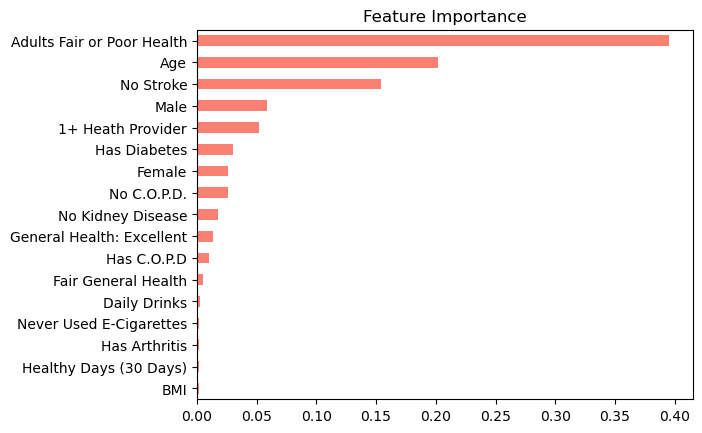

In [36]:
feature_importances.sort_values().plot.barh(color='salmon')
plt.title('Feature Importance')

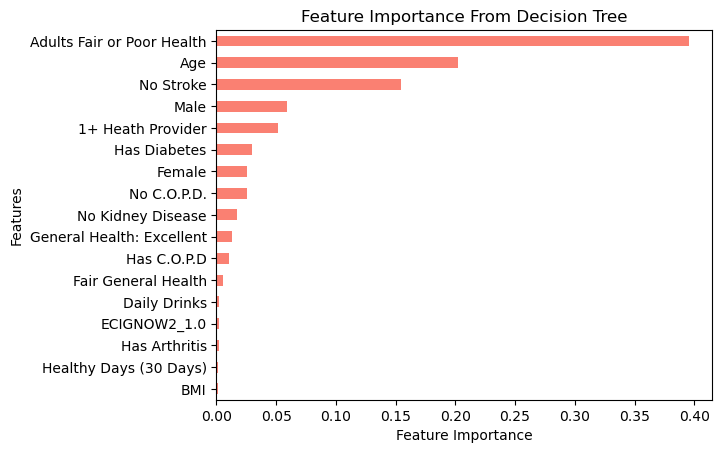

In [25]:
import matplotlib.pyplot as plt

# Assuming feature_importances is a Pandas Series
feature_importances = feature_importances.sort_values()

# Create a horizontal bar plot
ax = feature_importances.plot.barh(color='salmon')

# # Add numerical values at the end of each bar
# for bar, value in zip(ax.patches, feature_importances.values):
#     ax.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f'{value:.3f}', ha='left', va='center')

# Set labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance From Decision Tree')

# Show the plot
plt.show()


In [26]:
df.rename(columns=feature_dict, inplace=True)



In [27]:
dtree_string = export_text(dtree,feature_names=list(df.columns),decimals=1,spacing=5)
print(dtree_string)

|----- Adults Fair or Poor Health <= 0.5
|     |----- Age <= 0.4
|     |     |----- No Stroke <= 0.5
|     |     |     |----- Female <= 0.5
|     |     |     |     |----- Daily Drinks <= -0.2
|     |     |     |     |     |----- class: 2.0
|     |     |     |     |----- Daily Drinks >  -0.2
|     |     |     |     |     |----- class: 2.0
|     |     |     |----- Female >  0.5
|     |     |     |     |----- Has C.O.P.D <= 0.5
|     |     |     |     |     |----- class: 2.0
|     |     |     |     |----- Has C.O.P.D >  0.5
|     |     |     |     |     |----- class: 2.0
|     |     |----- No Stroke >  0.5
|     |     |     |----- Has Diabetes <= 0.5
|     |     |     |     |----- Age <= -0.2
|     |     |     |     |     |----- class: 2.0
|     |     |     |     |----- Age >  -0.2
|     |     |     |     |     |----- class: 2.0
|     |     |     |----- Has Diabetes >  0.5
|     |     |     |     |----- 1+ Heath Provider <= 0.5
|     |     |     |     |     |----- class: 2.0
|     |     |

In [28]:
# initialize tree
dtree_deep3 = DecisionTreeClassifier(max_depth=3)
dtree_deep3.fit(df, target)
dtree_string = export_text(dtree_deep3,feature_names=list(df.columns),decimals=1,spacing=5)
print(dtree_string)


|----- Adults Fair or Poor Health <= 0.5
|     |----- Age <= 0.4
|     |     |----- No Stroke <= 0.5
|     |     |     |----- class: 2.0
|     |     |----- No Stroke >  0.5
|     |     |     |----- class: 2.0
|     |----- Age >  0.4
|     |     |----- Female <= 0.5
|     |     |     |----- class: 2.0
|     |     |----- Female >  0.5
|     |     |     |----- class: 2.0
|----- Adults Fair or Poor Health >  0.5
|     |----- No Stroke <= 0.5
|     |     |----- No Kidney Disease <= 0.5
|     |     |     |----- class: 1.0
|     |     |----- No Kidney Disease >  0.5
|     |     |     |----- class: 2.0
|     |----- No Stroke >  0.5
|     |     |----- Age <= 0.1
|     |     |     |----- class: 2.0
|     |     |----- Age >  0.1
|     |     |     |----- class: 2.0



_MICHD:    
1.0: Have coronary heart disease (CHD) or myocardial infarction (MI)      
2.0: Do NOT Have coronary heart disease (CHD) or myocardial infarction (MI)     

In [29]:
target

2087      2.0
2088      1.0
2090      2.0
2091      2.0
2093      2.0
         ... 
431675    2.0
431676    2.0
431677    2.0
431680    2.0
431682    2.0
Name: _MICHD, Length: 122820, dtype: float64

In [30]:

result = pd.concat([df, target], axis=1)
result

,_STATE_1.0,_STATE_6.0,_STATE_9.0,_STATE_12.0,_STATE_13.0,_STATE_15.0,_STATE_17.0,_STATE_18.0,_STATE_20.0,_STATE_21.0,...,Daily Drinks,SLEPTIM1,HTIN4,_LLCPWT2,HEIGHT3,Healthy Days (30 Days),WTKG3,Weight,Age,_MICHD
2087,1,0,0,0,0,0,0,0,0,0,...,-0.117906,0.053732,-0.791858,1.120740,-0.442285,-1.498830,0.780356,0.076879,-1.016613,2.0
2088,1,0,0,0,0,0,0,0,0,0,...,-0.301975,-0.241227,0.177143,1.252981,-0.338735,-0.776594,0.069398,-0.025487,0.380796,1.0
2090,1,0,0,0,0,0,0,0,0,0,...,-0.301975,-0.241227,-1.276358,1.120740,-0.494060,0.774874,-0.145741,-0.056507,-0.118279,2.0
2091,1,0,0,0,0,0,0,0,0,0,...,-0.226182,-0.093747,-0.065107,1.120740,-0.364623,-1.525579,-0.102998,-0.050303,-1.415873,2.0
2093,1,0,0,0,0,0,0,0,0,0,...,0.780781,-0.241227,0.419393,1.120740,-0.312848,-1.552329,-1.007724,-0.180588,-0.717168,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431675,0,0,0,0,0,0,0,0,0,0,...,-0.150389,-0.093747,-0.307357,-0.126412,-0.390510,-1.525579,-0.038409,-0.040997,0.580426,2.0
431676,0,0,0,0,0,0,0,0,0,0,...,0.239403,0.053732,-0.307357,0.128715,-0.390510,0.774874,-0.404573,-0.093731,-0.018464,2.0
431677,0,0,0,0,0,0,0,0,0,0,...,0.163610,0.053732,0.903894,-0.126412,-0.261073,-1.445331,0.823574,0.083083,-1.216243,2.0
431680,0,0,0,0,0,0,0,0,0,0,...,-0.193699,-0.241227,-1.276358,0.111935,-0.494060,-1.552329,-1.222863,-0.211608,-1.515688,2.0


<Axes: xlabel='Age'>

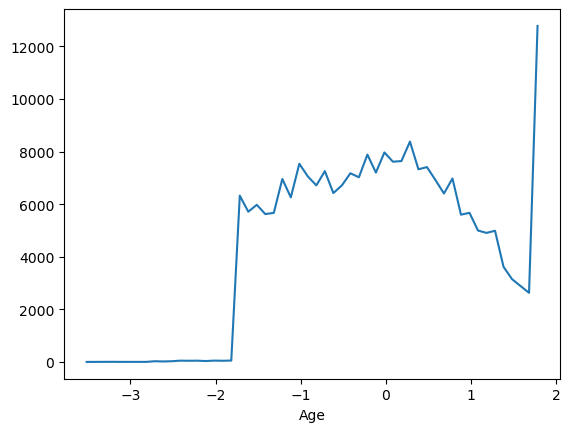

In [31]:
age_grp = result.groupby(by='Age')
age_grp._MICHD.sum().plot()

In [32]:
# conda install graphviz

In [33]:
# display tree
dot_data = export_graphviz(dtree_deep3,
            out_file=None,
            feature_names=df.columns,
            # class_names = ['bad','good'],
            proportion=True,
            impurity=False,
            filled=True,
            rounded=True)
graph = graphviz.Source(dot_data)
# graph.render('RedWine')
graph

NameError: name 'export_graphviz' is not defined